# Chapter 10: Morphological Image Processing

This is the companion file for Chapter 10.


## Video 10.1. Performing a dilation operation with a 3x3 square structuring element (first definition)

Dilation of a set $A$ by a structuring element $B$ is the set of all displacements, $z = (z_1,z_2)$, such that the reflection, $\check{B}_z$ and $A$ overlap by at least one element.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/dilation.gif)

## Video 10.2. Performing a dilation operation with a 3x3 square structuring element (second definition)

Like in the convolution operation, the structuring element is swept over the image. As we translate, when the origin of the structuring element touches a binary 1-pixel, the entire  structuring element is **OR**ed to the output image, which was initialized to all zeros.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/dilation2.gif)

## Video 10.3. Dilation of a binary image where the black pixels correspond to the object. 

Circular structuring elements of two different sizes, shown in the right, are used to close the holes and to enlarge the object.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/dilation3.gif)

## **Programming exercise 10.1**

1.   Run the following code to see the output of dilating the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 45. How does the output change?
3.   Try different structuring elements (e.g. diamond).

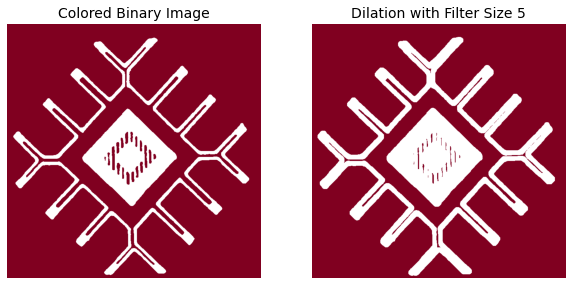

In [34]:
# Dilation
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_dilation

# Load the image
image_path = "images/kilim1.png"  
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)

# Convert the high-res image to binary (thresholding)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 5
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_dilation(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Dilation with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


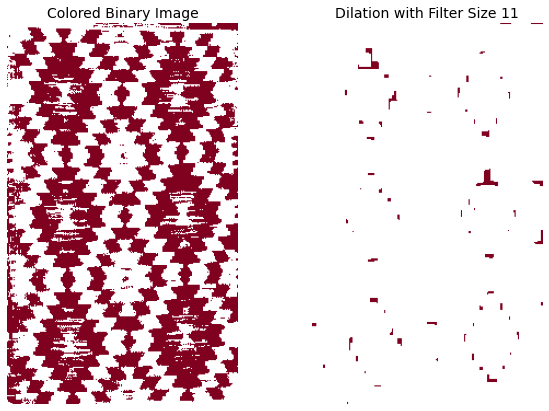

In [5]:
# Dilation
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_dilation

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)

# Convert the high-res image to binary (thresholding)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]    

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb 
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 11
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_dilation(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Dilation with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


## Video 10.4. Performing an erosion operation with a 3x3 square structuring element (first definition)

Erosion of an image $A$ by a structuring element $B$ is the set of all points $z =(z_1,z_2)$ such that the reflected structuring element $ (\check B)_z$, translated by $z$, is fully contained in $A$.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/erosion.gif)

## Video 10.5. Performing an erosion operation with a 3x3 square structuring element (second definition)

The structuring element is swept over the image. At each position where every 1-pixel of the structuring element covers a 1-pixel of the binary image, the binary image pixel corresponding to the origin of the structuring element is **AND**ed  with the output image.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/erosion2.gif)

## Video 10.6. Erosion of a binary image where the black pixels correspond to the object. 

Circular structuring elements of three different sizes, shown in the right, are used to break the bridges and to trim the object.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/erosion3.gif)

## **Programming exercise 10.2:**

1.   Run the following code to see the output of eroding the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 21. How does the output change?
3.   Try different structuring elements (e.g. diamond).

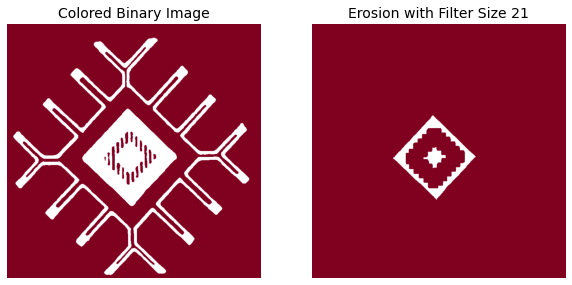

In [6]:
# Erosion
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_erosion


# Load the image
image_path = "images/kilim1.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 21
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_erosion(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Erosion with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


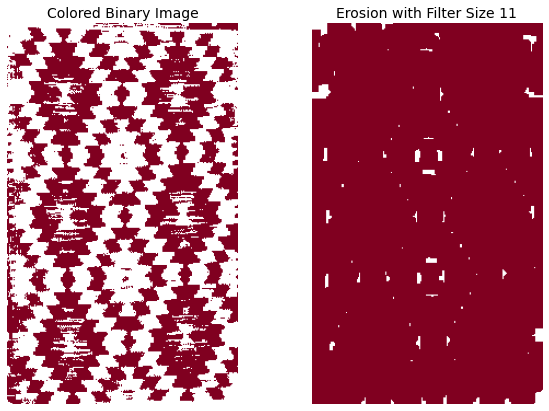

In [7]:
# Erosion
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_erosion

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 11
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_erosion(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb   
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Erosion with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


## Video 10.7. Opening of a binary image where the black pixels correspond to the object. 

Circular structuring elements of three different sizes, shown in the right, are used to open the image.

![Alt text](https://raw.githubusercontent.com/hazalmogultay/466Images/master/W11/opening.gif)

## **Programming exercise 10.3:**

1.   Run the following code to see the output of opening the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 21. How does the output change?
3.   Try different structuring elements (e.g. diamond).

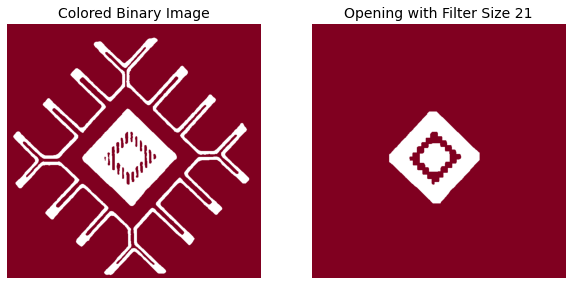

In [8]:
# Opening
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_opening

# Load the image
image_path = "images/kilim1.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 21
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_opening(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb   
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Opening with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


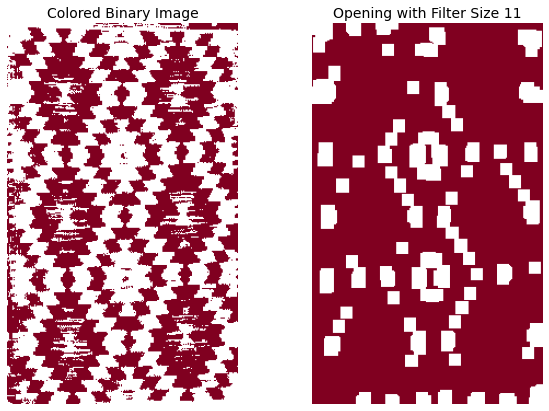

In [9]:
# Opening
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_opening

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb    

# Define the filter size
filter_size = 11
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_opening(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Opening with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')


plt.show()


## **Programming exercise 10.4:**

1.   Run the following code to see the output of closing the image with a square structuring element.
2.   Change the width of the structuring element to 5 and 45. How does the output change?
3.   Try different structuring elements (e.g. diamond).

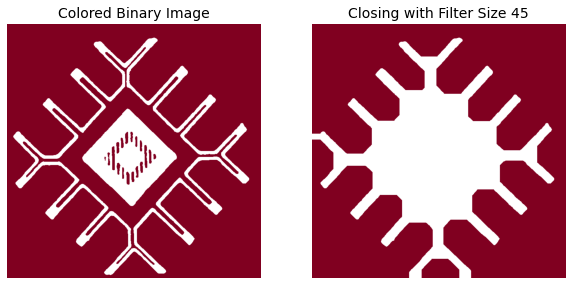

In [11]:
# Closing
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_closing

# Load the image
image_path = "images/kilim1.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  # Foreground pixels to burgundy
colored_binary_image[binary_image == 0] = burgundy_rgb    # Background pixels to white

# Define the filter size
filter_size = 45
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_closing(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    # Background pixels to white
output_image_rgb[output_image == 1] = white_rgb     # Foreground pixels to burgundy

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Closing with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


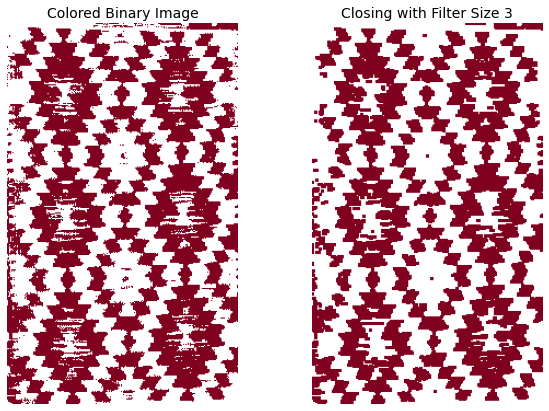

In [36]:
# Closing
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import square, binary_closing

# Try another image
image_path = "images/kilim_color.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Define RGB values for white and burgundy
white_rgb = [255, 255, 255]  
burgundy_rgb = [128, 0, 32]     

# Create a color image from the binary image
colored_binary_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
colored_binary_image[binary_image == 255] = white_rgb  
colored_binary_image[binary_image == 0] = burgundy_rgb   


# Define the filter size
filter_size = 3
se = square(filter_size)

# Perform the binary operation on the high-res image
output_image = binary_closing(binary_image, se)

# Convert processed binary output to RGB for saving
output_image_rgb = np.zeros((output_image.shape[0], output_image.shape[1], 3), dtype=np.uint8)
output_image_rgb[output_image == 0] = burgundy_rgb    
output_image_rgb[output_image == 1] = white_rgb     

# Display the colored binary and dilated images
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title("Colored Binary Image", fontsize=14)
plt.imshow(colored_binary_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Closing with Filter Size {filter_size}", fontsize=14)
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()


688 688


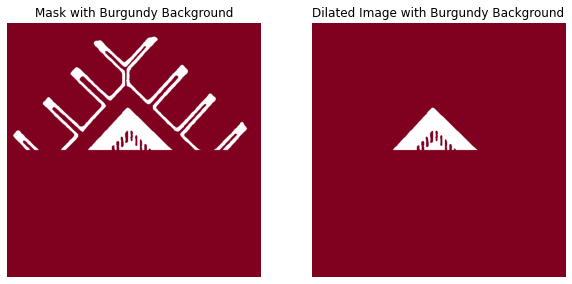

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image (RGB or BGR)
image = cv2.imread('images/kilim_bordo.png')  # Replace with your colored image path

# Convert to grayscale (binary thresholding will follow this)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binarization to the grayscale image (using a threshold)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Get image dimensions
h, w = binary_image.shape

# Create the mask: Upper half of the binary image (copy the upper half)
mask = np.zeros_like(binary_image)

# Upper half of the image becomes the mask (same as the original binary image)
mask[:h//2, :] = binary_image[:h//2, :]

# Function to apply burgundy background
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white

    # Create a 3-channel image
    color_image = np.zeros((h, w, 3), dtype=np.uint8)

    # Assign colors: Foreground → White, Background → Burgundy
    color_image[binary_img == 255] = white  
    color_image[binary_img == 0] = burgundy  

    return color_image

# Apply burgundy background transformation to the mask
mask_colored = apply_burgundy_background(mask)

# Create an image all black except for the center pixel (white)
initial_image = np.zeros_like(binary_image)
center_x, center_y = w // 2, h // 2
initial_image[center_y, center_x] = 255  # Set the center pixel to white

#initial_image = np.zeros_like(binary_image)
#start_x, start_y = 54, h//2
#initial_image[start_y, start_x] = 255  # Set the new starting pixel to white
print(w,h)
# Define a small structuring element for dilation
kernel = np.ones((5, 5), np.uint8)

# Perform dilation iteratively, using the intersection with the mask
dilated_image = initial_image.copy()

# Number of iterations for dilation
iterations = 100

for i in range(iterations):
    dilated_image = cv2.dilate(dilated_image, kernel, iterations=1)
    dilated_image = np.minimum(dilated_image, mask)  # Keep only the intersection with the mask

# Apply burgundy background transformation to the dilated image
dilated_colored = apply_burgundy_background(dilated_image)


# Visualize results
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask_colored)
plt.title('Mask with Burgundy Background')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_colored)
plt.title('Dilated Image with Burgundy Background')
plt.axis('off')

plt.show()


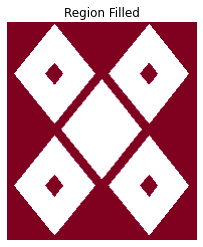

In [18]:
import cv2
import numpy as np

# Load the color image
image = cv2.imread("images/region_filling_input.png")

# Convert to grayscale and then to binary
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Define the cross-shaped structuring element
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Find the center point
h, w = binary.shape
seed = (h // 2, w // 2)

# Ensure the seed is inside the region
if binary[seed] == 255:  # If the center is part of the boundary, find a nearby inside point
    for r in range(1, min(h, w) // 2):
        for dy, dx in [(-r, 0), (r, 0), (0, -r), (0, r)]:  # Check in four directions
            ny, nx = seed[0] + dy, seed[1] + dx
            if 0 <= ny < h and 0 <= nx < w and binary[ny, nx] == 0:
                seed = (ny, nx)
                break
        if binary[seed] == 0:
            break

# Initialize region filling
filled = np.zeros_like(binary, dtype=np.uint8)
filled[seed] = 255  # Set the starting point

# Perform iterative region filling
while True:
    new_filled = cv2.dilate(filled, kernel) & ~binary  # Apply dilation and mask
    if np.array_equal(new_filled, filled):  # Stop when no changes
        break
    filled = new_filled

# Combine filled region with the original boundary
result = apply_burgundy_background(filled | binary)

plt.imshow(result)
plt.axis('off')
plt.title("Region Filled")
plt.show()


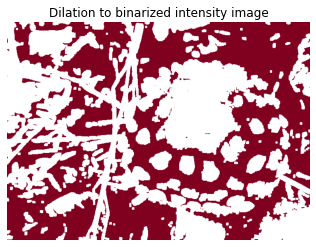

In [19]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('images/redmushroom_long.png')

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into R, G, B channels
r, g, b = cv2.split(image_rgb)

# Convert the R, G, B channels to float type
r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)

# Calculate Intensity (I) as the average of R, G, B
intensity = (r + g + b) / 3.0

# Threshold the Intensity image to binarize it
threshold_value = 128  # You can change this based on your preference
_, binarized_intensity = cv2.threshold(np.uint8(np.clip(intensity, 0, 255)), threshold_value, 255, cv2.THRESH_BINARY)

# Apply dilation to the binarized intensity image
kernel = np.ones((5, 5), np.uint8)  # You can adjust the size of the kernel
dilated_intensity = cv2.dilate(binarized_intensity, kernel, iterations=1)
dilated_intensity = apply_burgundy_background(dilated_intensity)

# Save the dilated intensity image
#cv2.imwrite('dilated_binarized_intensity.png', cv2.cvtColor(dilated_intensity, cv2.COLOR_RGB2BGR))

plt.imshow(dilated_intensity)
plt.axis('off')
plt.title("Dilation to binarized intensity image")
plt.show()


## **Programming exercises 10.5**

1.   Run the following code to see the output of thinning and skeletonization.

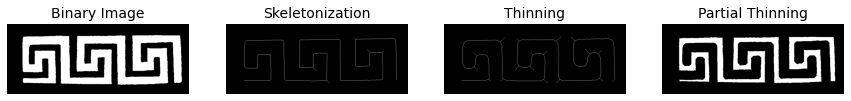

In [21]:
# Skeletonization and Thinning
from skimage.morphology import skeletonize, thin
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "images/suyolu_color.png"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the high-res image to binary (thresholding)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_not(binary_image)

# Convert binary image from [0, 255] to [0, 1]
binary_image = binary_image / 255  # Now values are in range [0, 1]

# Perform skeletonization and thinning
skeleton = skeletonize(binary_image)
thinned = thin(binary_image)
partial_thinned = thin(binary_image / 255, max_num_iter=8)  # Ensure image is also in [0, 1] range

# Display results
plt.figure(figsize=(15, 8))
plt.subplot(141), plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image', fontsize=14), plt.axis('off')
plt.subplot(142), plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonization', fontsize=14), plt.axis('off')
plt.subplot(143), plt.imshow(thinned, cmap='gray')
plt.title('Thinning', fontsize=14), plt.axis('off')
plt.subplot(144), plt.imshow(partial_thinned, cmap='gray')
plt.title('Partial Thinning', fontsize=14), plt.axis('off')

plt.show()


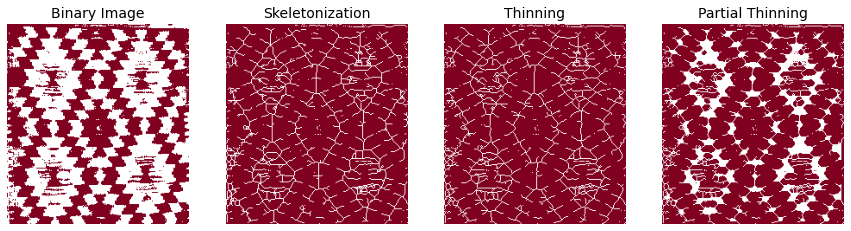

In [22]:
from skimage.morphology import skeletonize, thin
import cv2
import numpy as np

# Function to apply burgundy background
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white

    # Create a 3-channel image
    color_image = np.zeros((h, w, 3), dtype=np.uint8)

    # Assign colors: Foreground → White, Background → Burgundy
    color_image[binary_img == 255] = white  
    color_image[binary_img == 0] = burgundy  

    return color_image

# Load the image
image_path = "images/cropped_kilim_image.png"  
rgb_image = cv2.imread(image_path)

# Split the RGB image into its channels
blue_channel, green_channel, red_channel = cv2.split(rgb_image)

# Convert the blue channel to binary (thresholding)
_, binary_image = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)

# Convert binary image from [0, 255] to [0, 1]
binary_image = binary_image / 255  # Now values are in range [0, 1]

# Perform skeletonization and thinning
skeleton = skeletonize(binary_image)
thinned = thin(binary_image)
partial_thinned = thin(binary_image, max_num_iter=3)  # Ensure image is also in [0, 1] range

# Convert back to uint8 for saving with cv2
binary_image = (binary_image * 255).astype(np.uint8)
skeleton = (skeleton * 255).astype(np.uint8)
thinned = (thinned * 255).astype(np.uint8)
partial_thinned = (partial_thinned * 255).astype(np.uint8)

# Apply burgundy background to each image
binary_image_burgundy = apply_burgundy_background(binary_image)
skeleton_burgundy = apply_burgundy_background(skeleton)
thinned_burgundy = apply_burgundy_background(thinned)
partial_thinned_burgundy = apply_burgundy_background(partial_thinned)

# Convert images to RGB before saving
#binary_image_burgundy = cv2.cvtColor(binary_image_burgundy, cv2.COLOR_BGR2RGB)
#skeleton_burgundy = cv2.cvtColor(skeleton_burgundy, cv2.COLOR_BGR2RGB)
#thinned_burgundy = cv2.cvtColor(thinned_burgundy, cv2.COLOR_BGR2RGB)
#partial_thinned_burgundy = cv2.cvtColor(partial_thinned_burgundy, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(15, 8))
plt.subplot(141), plt.imshow(binary_image_burgundy, cmap='gray')
plt.title('Binary Image', fontsize=14), plt.axis('off')
plt.subplot(142), plt.imshow(skeleton_burgundy, cmap='gray')
plt.title('Skeletonization', fontsize=14), plt.axis('off')
plt.subplot(143), plt.imshow(thinned_burgundy, cmap='gray')
plt.title('Thinning', fontsize=14), plt.axis('off')
plt.subplot(144), plt.imshow(partial_thinned_burgundy, cmap='gray')
plt.title('Partial Thinning', fontsize=14), plt.axis('off')

plt.show()


## **Programming exercise 10.6:**

1.   Run the following code to see the output of several morphological operations on the example grayscale image.

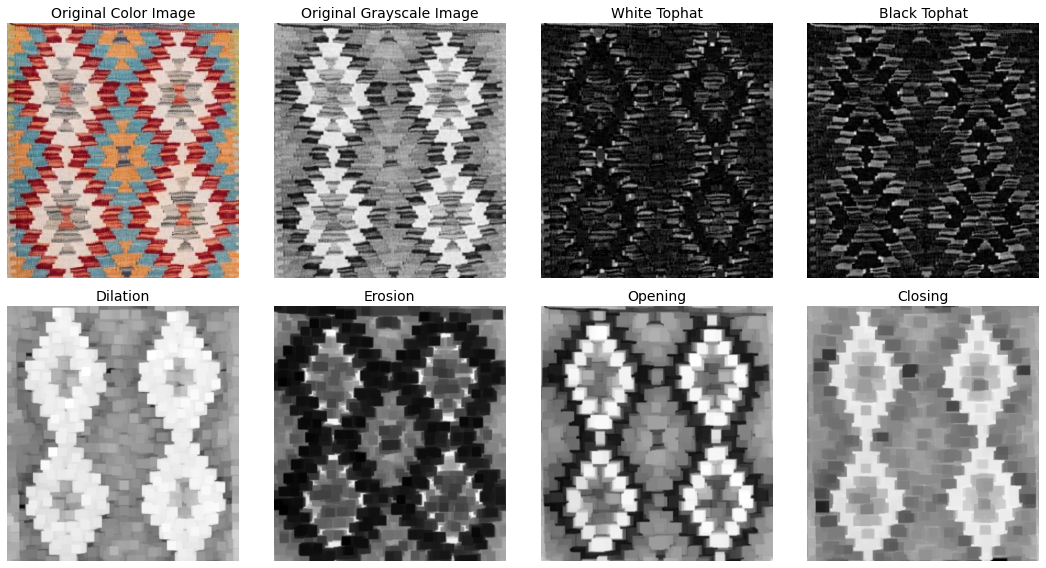

In [23]:
# Grayscale morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, black_tophat, square

# Load the RGB image as a color image
image_path = "images/cropped_kilim_image.png"  # Replace with your image path
color_image = cv2.imread(image_path)  # Load as color image (BGR format)

# Convert BGR to RGB
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Convert the color image to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Resize the grayscale image to high resolution (scale = 4)
scale_factor = 4
new_width = int(gray_image.shape[1] * scale_factor)
new_height = int(gray_image.shape[0] * scale_factor)
high_res_image = cv2.resize(gray_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

# Create a structuring element
se = square(30)

# Perform morphological operations
white_tophat_output = white_tophat(high_res_image, se)
black_tophat_output = black_tophat(high_res_image, se)
dilation_output = dilation(high_res_image, se)
erosion_output = erosion(high_res_image, se)
opening_output = opening(high_res_image, se)
closing_output = closing(high_res_image, se)

# Display results
plt.figure(figsize=(15, 8))
plt.subplot(241), plt.imshow(color_image_rgb)
plt.title('Original Color Image', fontsize=14), plt.axis('off')
plt.subplot(242), plt.imshow(high_res_image, cmap='gray')
plt.title('Original Grayscale Image', fontsize=14), plt.axis('off')
plt.subplot(243), plt.imshow(white_tophat_output, cmap='gray')
plt.title('White Tophat', fontsize=14), plt.axis('off')
plt.subplot(244), plt.imshow(black_tophat_output, cmap='gray')
plt.title('Black Tophat', fontsize=14), plt.axis('off')
plt.subplot(245), plt.imshow(dilation_output, cmap='gray')
plt.title('Dilation', fontsize=14), plt.axis('off')
plt.subplot(246), plt.imshow(erosion_output, cmap='gray')
plt.title('Erosion', fontsize=14), plt.axis('off')
plt.subplot(247), plt.imshow(opening_output, cmap='gray')
plt.title('Opening', fontsize=14), plt.axis('off')
plt.subplot(248), plt.imshow(closing_output, cmap='gray')
plt.title('Closing', fontsize=14), plt.axis('off')


plt.tight_layout()
plt.show()


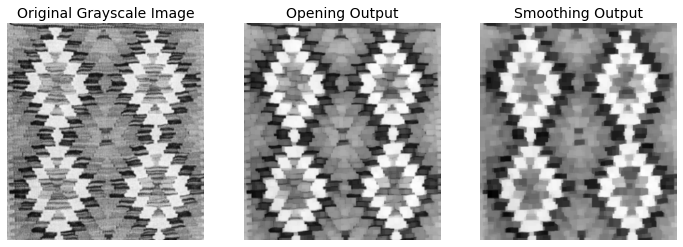

In [26]:
# Morphological smoothing
se = square(15)
opening_output = opening(high_res_image, se)
smoothing_output = closing(opening_output, se)
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(high_res_image, cmap='gray')
plt.title('Original Grayscale Image', fontsize=14), plt.axis('off')
plt.subplot(132), plt.imshow(opening_output, cmap='gray')
plt.title('Opening Output', fontsize=14), plt.axis('off')
plt.subplot(133), plt.imshow(smoothing_output, cmap='gray')
plt.title('Smoothing Output', fontsize=14), plt.axis('off')
plt.show()



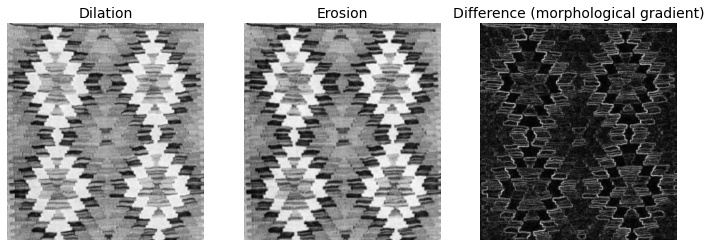

In [28]:
# Morphological gradient
se = square(3)
dilation_output = dilation(high_res_image, se)
erosion_output = erosion(high_res_image, se)
diff = dilation_output - erosion_output
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(dilation_output, cmap='gray')
plt.title('Dilation', fontsize=14), plt.axis('off')
plt.subplot(132), plt.imshow(erosion_output, cmap='gray')
plt.title('Erosion', fontsize=14), plt.axis('off')
plt.subplot(133), plt.imshow(diff, cmap='gray')
plt.title('Difference (morphological gradient)', fontsize=14), plt.axis('off')
plt.show()


## **10.7. Programming exercise:**

1.   Run the following code to perform morphological segmentation.

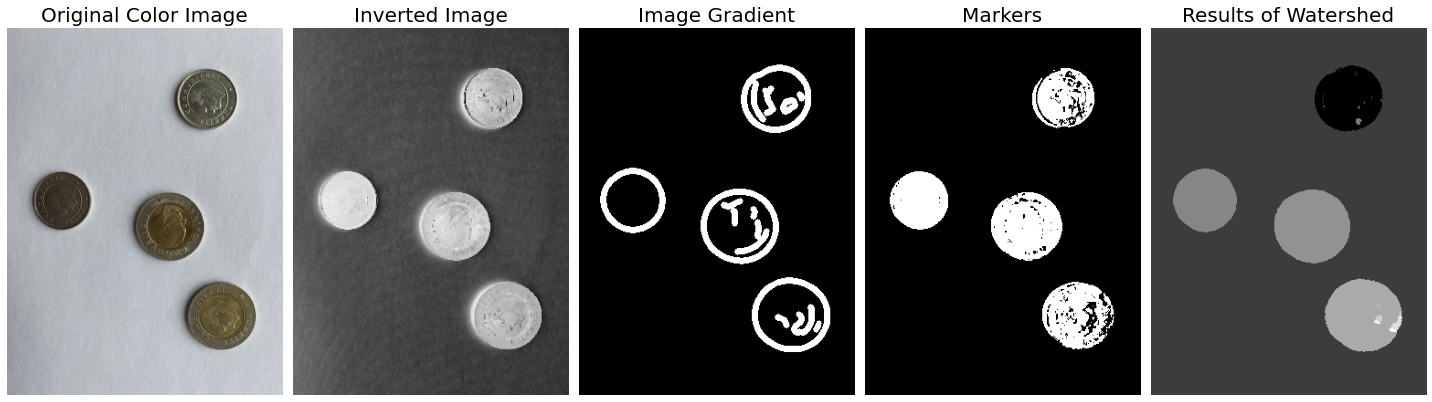

In [29]:
# Morphological segmentation with Watershed algorithm
from skimage import io, feature, color
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_fill_holes
from skimage.morphology import square, disk
from skimage.filters.rank import median
from skimage.transform import rescale
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed
from skimage.morphology import dilation

# Download the image
!wget -cq https://raw.githubusercontent.com/hazalmogultay/466Images/master/W12/coins.jpeg

# Load the color image
im_color = io.imread('coins.jpeg')

# Convert to grayscale
im_g = color.rgb2gray(im_color)

# Rescale and invert the image
im = img_as_ubyte(rescale(im_g, 0.1, anti_aliasing=False))
im = np.invert(im)

# Apply median filter
im = median(im, disk(1))

# Detect edges with Canny edge detector
im_gradient = feature.canny(im, sigma=3, low_threshold=15, high_threshold=20)

# Apply dilation (edges become thicker)
im_gradient = dilation(im_gradient, disk(3))

# Find markers from background and coins
markers = np.zeros_like(im)
markers[im > 160] = 2
markers[im < 20] = 1
label_img2 = label(markers)

# Apply Watershed algorithm on the image gradient using the markers to perform segmentation 
labels1 = watershed(im_gradient, markers=label_img2)

# Display results
plt.figure(figsize=(20, 15))
plt.subplot(151)
plt.imshow(im_color)  # Display the original color image
plt.title('Original Color Image', fontsize=20)
plt.axis('off')

plt.subplot(152)
plt.imshow(im, cmap='gray')
plt.title('Inverted Image', fontsize=20)
plt.axis('off')

plt.subplot(153)
plt.imshow(im_gradient, cmap='gray')
plt.title('Image Gradient', fontsize=20)
plt.axis('off')

plt.subplot(154)
plt.imshow(markers.astype('int'), cmap='gray')
plt.title('Markers', fontsize=20)
plt.axis('off')

plt.subplot(155)
plt.imshow(labels1, cmap='gray')
plt.title('Results of Watershed', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import opening, erosion, dilation, disk, closing

# Load Image
#image_color = cv2.imread("coins2.jpg")
#image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
#image_color = cv2.resize(image_color, None, fx=0.125, fy=0.125, interpolation=cv2.INTER_AREA)
#image_color = image_color[115:, :]
#cv2.imwrite("coins3.png", cv2.cvtColor(image_color, cv2.COLOR_RGB2BGR))


image = cv2.imread("images/coins3.png", cv2.IMREAD_GRAYSCALE)
h, w = image.shape
print(h,w)

# Apply Thresholding
_, binary = cv2.threshold(image, 121, 255, cv2.THRESH_BINARY_INV)  # Invert for better processing

# Remove Textures using Morphological Closing
closed = closing(binary, disk(2))  # Adjust kernel size if needed


# Remove Small Objects (Small Coins) using Erosion → Dilation
eroded = erosion(closed, disk(32))
dilated = dilation(eroded, disk(33))


# Display the final image
plt.figure(figsize=(15, 8))
plt.subplot(151), plt.imshow(image_color, cmap="gray")
plt.title('Input image', fontsize=14), plt.axis('off')
plt.subplot(152), plt.imshow(closed, cmap="gray")
plt.title('Binary image', fontsize=14), plt.axis('off')
plt.subplot(153), plt.imshow(eroded, cmap="gray")
plt.title('Eroded', fontsize=14), plt.axis('off')
plt.subplot(154), plt.imshow(dilated, cmap="gray")
plt.title('Only large coins', fontsize=14), plt.axis('off')

plt.axis("off")
plt.show()



[ WARN:0@1917.179] global loadsave.cpp:248 findDecoder imread_('coins3.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

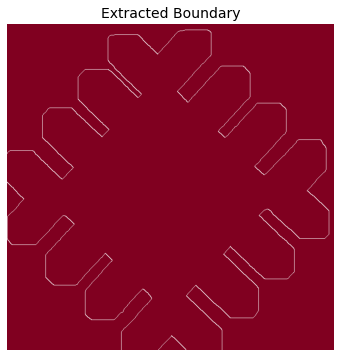

In [33]:
#Boundary extraction

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours

# Function to apply burgundy background
def apply_burgundy_background(binary_img):
    h, w = binary_img.shape
    burgundy = np.array([128, 0, 32], dtype=np.uint8)  # RGB color for burgundy
    white = np.array([255, 255, 255], dtype=np.uint8)  # RGB color for white

    # Create a 3-channel image
    color_image = np.zeros((h, w, 3), dtype=np.uint8)

    # Assign colors: Background → Burgundy, Boundary → White
    color_image[binary_img == 0] = burgundy  # Background
    color_image[binary_img == 1] = white  # Boundary (white)

    return color_image

# Load the image
image_path = "images/boundary_ext.png"  
rgb_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image (you can adjust the threshold value)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Convert to [0, 1] range for skimage
binary_image = binary_image / 255

# Find contours using skimage
contours = find_contours(binary_image, level=0.5)  # Find contours at the binary threshold

# Create an empty binary image to draw contours on
boundary_image = np.zeros_like(binary_image, dtype=np.uint8)

# Draw contours on the binary image (boundary = white)
for contour in contours:
    contour = contour.astype(int)  # Convert to integer coordinates
    for point in contour:
        boundary_image[point[0], point[1]] = 1  # Set boundary pixels to 1 (white)

# Apply the burgundy background
boundary_image_burgundy = apply_burgundy_background(boundary_image)

# Convert the image from [0, 1] back to [0, 255] for saving and viewing
boundary_image_burgundy = (boundary_image_burgundy).astype(np.uint8)

# Visualize the boundary image with burgundy background
plt.figure(figsize=(8, 6))
plt.imshow(boundary_image_burgundy)
plt.title('Extracted Boundary', fontsize=14)
plt.axis('off')
plt.show()

